<a href="https://colab.research.google.com/github/ronald-ye/ronald-ye.github.io/blob/master/LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ziming Ronald Ye Marx**

**Date: 28/11/2022**

LendingClub is a peer-to-peer lending platform based in the United States. Borrowers can use it to generate unsecured personal loans, and investors can choose which loan to invest in based on the information provided.

Borrowers pay the loan's interest to alleviate financial stress. Investors profit from interest payments. Meanwhile, the platform charges borrowers startup costs and investors service fees.



One of the key concerns of investors is whether or not borrowers will default on their debts. If the default occurs, investors will lose their money. In this study, I used the Light GBM to forecast the loan status of the borrowers with an accuracy of 80%.



In [ ]:
# Import necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# Read a CSV file containing loan data into a Pandas DataFrame and display its shape (rows and columns).
RawLoan = pd.read_csv("/content/Data (1).csv")
RawLoan.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,49,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(51712, 151)

In [ ]:
# Display the first five rows of the DataFrame to get a preview of the data.
RawLoan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68376710,NaN,16000,16000,16000.0,60,14.85,379.39,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,67808313,NaN,28000,28000,28000.0,60,10.78,605.73,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68386728,NaN,10800,10800,10800.0,60,8.49,221.53,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68416679,NaN,8725,8725,8725.0,36,11.99,289.76,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68575042,NaN,28000,28000,28000.0,60,14.85,663.92,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Select specific columns from the DataFrame to focus on relevant features.
RawLoan = RawLoan[["grade", "sub_grade", "open_acc", "loan_status", "pub_rec", "dti", "delinq_2yrs", "inq_last_6mths", "annual_inc", "home_ownership", "purpose", "addr_state", "loan_amnt", "int_rate", "installment", "issue_d", "revol_bal", "revol_util", "term"]]

In [ ]:
# Display the DataFrame with selected columns.
RawLoan

,grade,sub_grade,open_acc,loan_status,pub_rec,dti,delinq_2yrs,inq_last_6mths,annual_inc,home_ownership,purpose,addr_state,loan_amnt,int_rate,installment,issue_d,revol_bal,revol_util,term
0,C,C5,13,1,1,16.65,0,1,90000.0,RENT,credit_card,CA,16000,14.85,379.39,Dec-2015,10159,51.8,60
1,B,B4,13,1,0,26.15,0,0,135000.0,MORTGAGE,debt_consolidation,OH,28000,10.78,605.73,Dec-2015,37679,60.4,60
2,B,B1,17,1,0,12.25,0,2,96000.0,MORTGAGE,car,NC,10800,8.49,221.53,Dec-2015,37430,49.1,60
3,C,C1,9,1,0,29.56,0,0,60000.0,MORTGAGE,debt_consolidation,MO,8725,11.99,289.76,Dec-2015,7990,38.6,36
4,C,C5,10,1,0,24.02,0,1,110000.0,MORTGAGE,debt_consolidation,CT,28000,14.85,663.92,Dec-2015,18524,31.3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,A,A3,9,0,0,26.13,0,1,35000.0,MORTGAGE,credit_card,AL,6000,6.89,184.97,Oct-2015,5893,36.8,36
51708,D,D1,11,0,0,25.61,0,0,53000.0,MORTGAGE,debt_consolidation,NC,28000,17.09,697.23,Jan-2018,32406,83.5,60
51709,D,D2,12,0,0,24.12,0,0,53591.0,RENT,debt_consolidation,PA,13750,14.96,476.39,Mar-2010,13502,54.0,36
51710,E,E1,36,0,0,28.48,0,1,94992.0,MORTGAGE,medical,IN,6500,22.74,250.74,Feb-2017,25359,66.4,36


In [ ]:
# Check for missing values in df and show the column names and the number of missing values in each column
RawLoan.isnull().sum()

grade              0
sub_grade          0
open_acc           0
loan_status        0
pub_rec            0
dti               37
delinq_2yrs        0
inq_last_6mths     0
annual_inc         0
home_ownership     0
purpose            0
addr_state         0
loan_amnt          0
int_rate           0
installment        0
issue_d            0
revol_bal          0
revol_util        48
term               0
dtype: int64

In [ ]:
# Display the total count of missing values in the entire DataFrame.
RawLoan.isnull().sum().sum()

85

**Exploratory Data Analysis**

In [ ]:
Loan = RawLoan

Text(0.5, 1.0, 'Purpose of Loan')

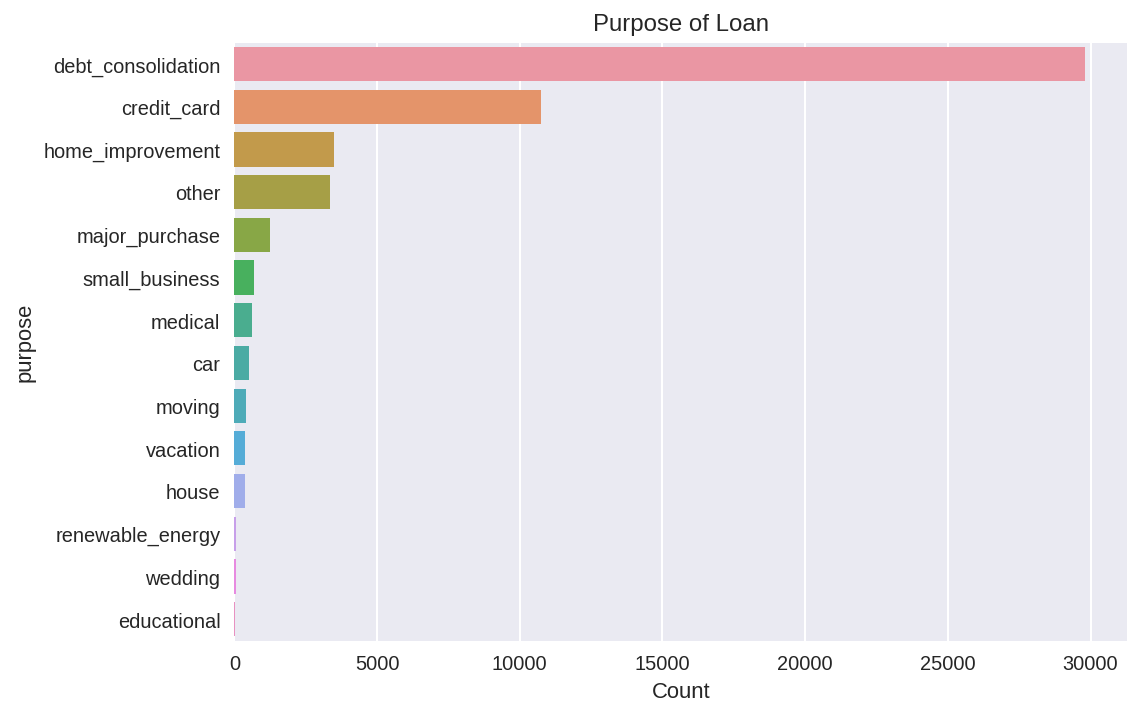

In [ ]:
# Begin exploratory data analysis by visualizing loan purposes using a count plot.
plt.style.use('seaborn')
sns.countplot(y="purpose", data=Loan,
              order=Loan["purpose"].value_counts().index)
plt.xlabel('Count')
plt.title('Purpose of Loan')

The interest rate shows a strong correlation with the credit grade, showing a direct proportion. This means, the lower the credit grade is ("G" being the lowest), the higher the interest rate.

Text(0, 0.5, 'Interest Rate')

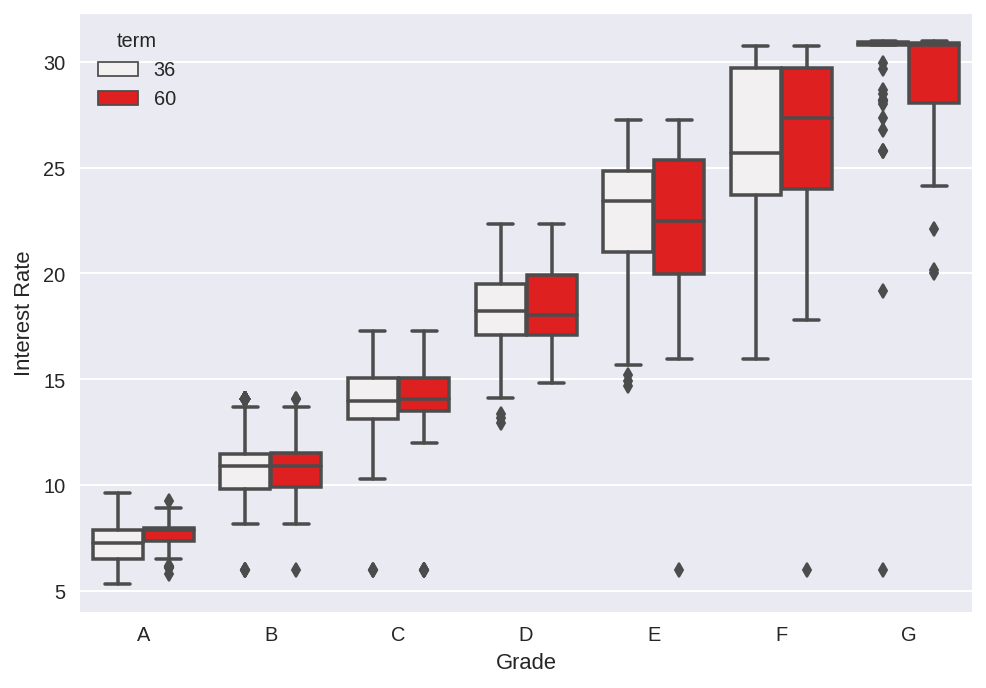

In [ ]:
# Create a box plot to show the relationship between credit grade and interest rate.
sns.boxplot(x='grade', y='int_rate', data=Loan,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='term', color='r')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

The interest rate of a 60-month term loan is 3.27% higher than a 36-month term loan.

In [ ]:
# Calculate and display the mean interest rates for different loan terms.
Loan.groupby('term').mean()['int_rate']

term
36    12.779886
60    17.100192
Name: int_rate, dtype: float64

The interest rates differ among different loan purposes.

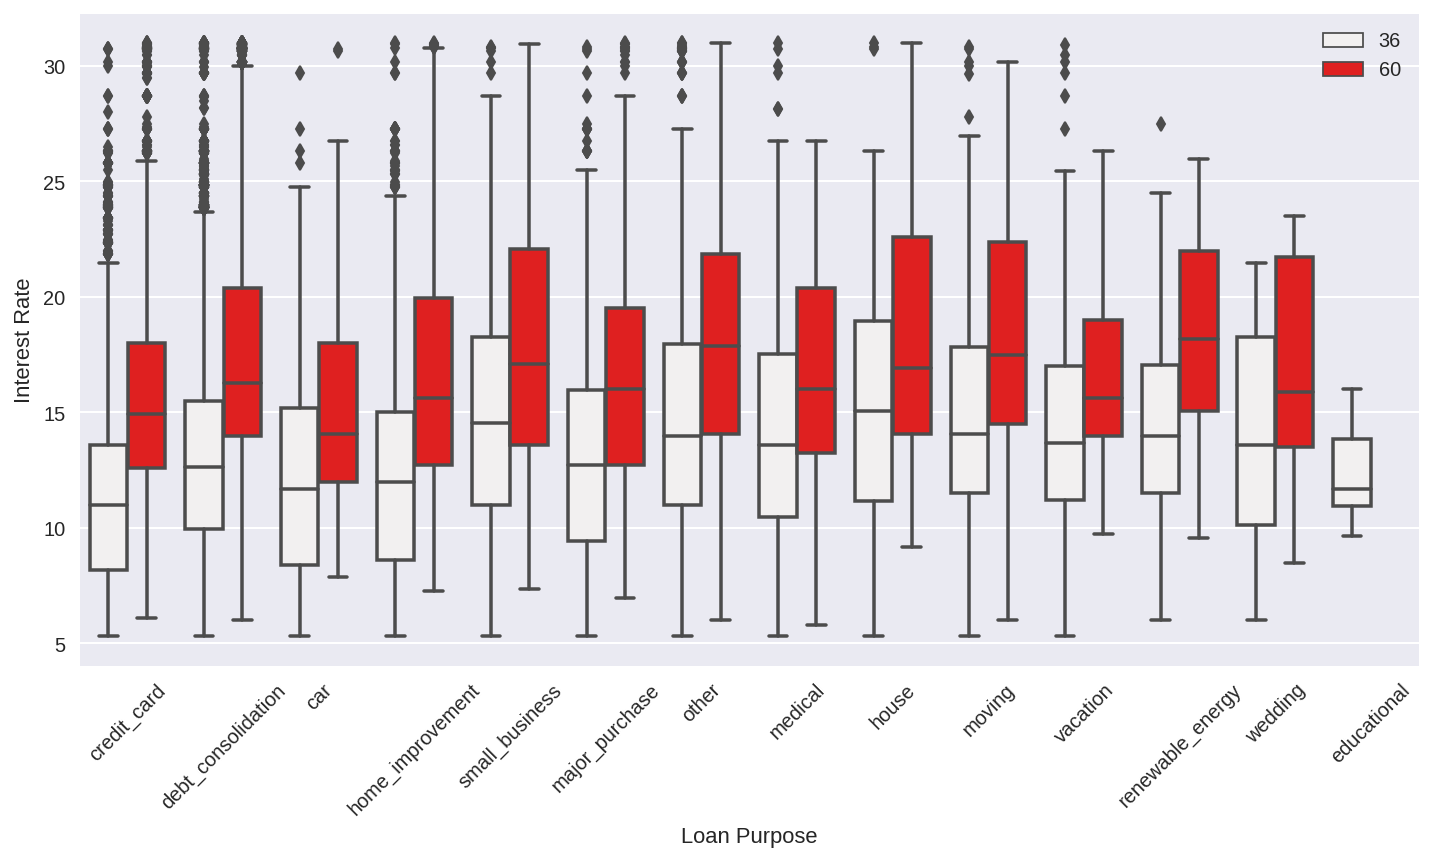

In [ ]:
# Create box plots to visualize interest rates by loan purpose and term.
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='int_rate', data=Loan, hue='term', color='r')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

The maximum loan limit is up to $40,000.

In [ ]:
# Calculate and display the maximum loan amount in the dataset.
Loan["loan_amnt"].max()

40000

The loan amount differ among different loan purposes.

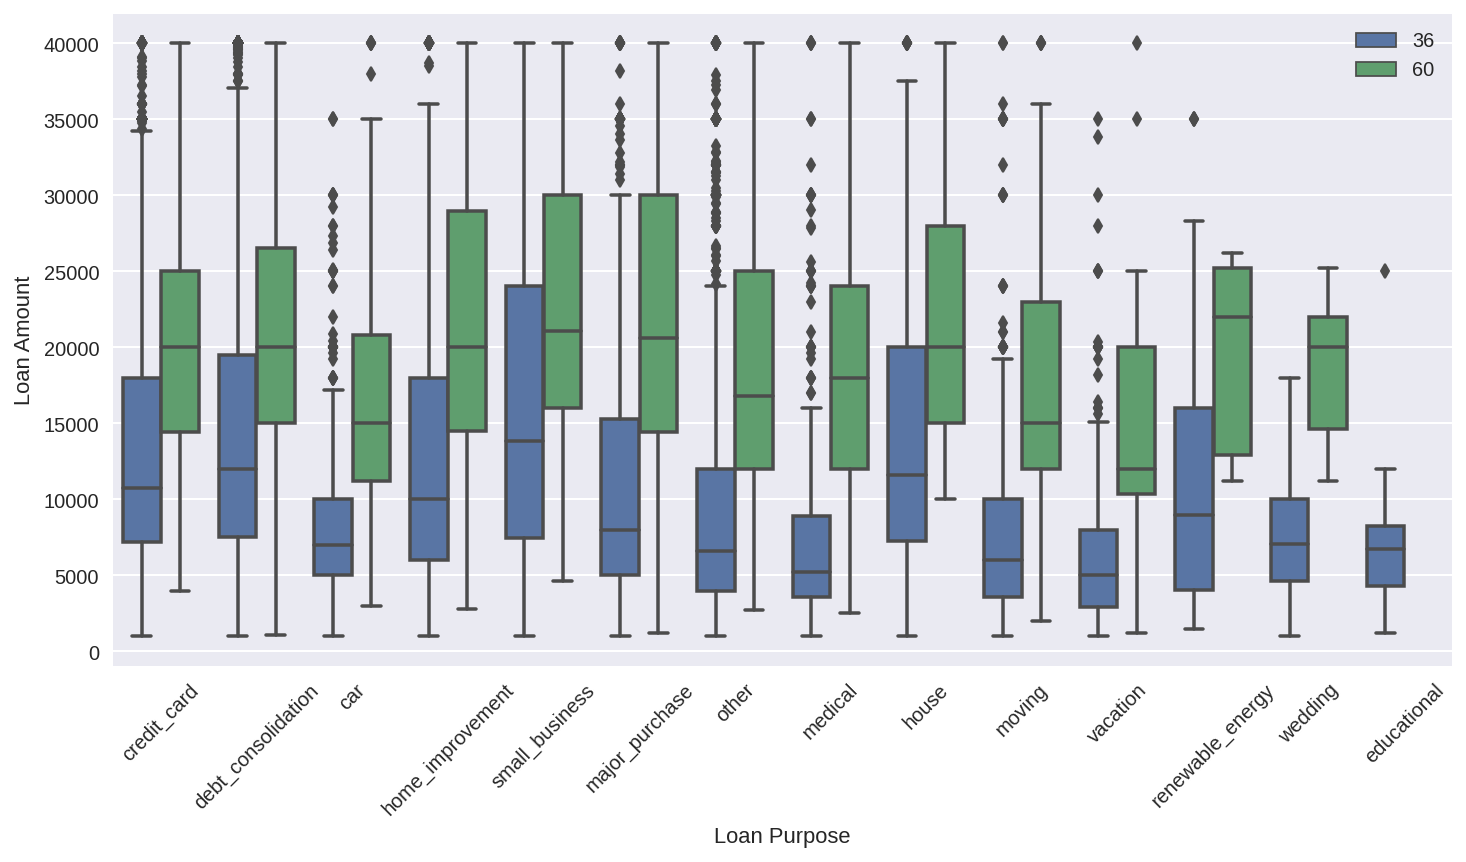

In [ ]:
# Create box plots to visualize loan amount by loan purpose and term.
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=Loan, hue='term')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 45)
plt.legend(loc='upper right');

1    0.5
0    0.5
Name: loan_status, dtype: float64

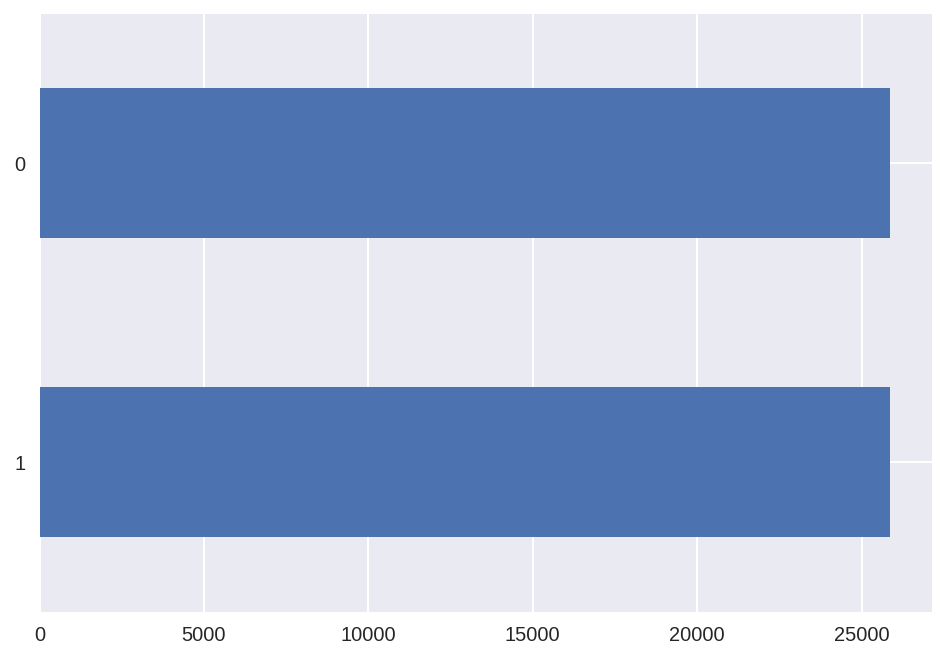

In [ ]:
# Create a horizontal bar plot to show the distribution of loan statuses (defaulters vs. payers).
Loan["loan_status"].value_counts(ascending=True).plot(kind='barh')
Loan["loan_status"].value_counts()/Loan.shape[0]

**Data Preparation**

In [ ]:
Loan.describe()

,open_acc,loan_status,pub_rec,dti,delinq_2yrs,inq_last_6mths,annual_inc,loan_amnt,int_rate,installment,revol_bal,revol_util,term
count,51712.000000,51712.000000,51712.000000,51675.00000,51712.000000,51712.000000,5.171200e+04,51712.000000,51712.000000,51712.000000,51712.000000,51664.000000,51712.000000
mean,11.570022,0.500000,0.224049,18.92621,0.335106,0.621790,7.737871e+04,15595.104618,14.121544,467.578719,15811.967280,50.405723,43.453125
std,5.685747,0.500005,0.669814,14.86628,0.921216,0.899474,7.267507e+04,9334.883328,5.160712,277.195039,20969.681564,24.706442,11.105328
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,1000.000000,5.310000,7.610000,0.000000,0.000000,36.000000
25%,8.000000,0.000000,0.000000,11.76000,0.000000,0.000000,4.600000e+04,8000.000000,10.490000,263.770000,5666.000000,31.800000,36.000000
50%,11.000000,0.500000,0.000000,17.86000,0.000000,0.000000,6.500000e+04,14000.000000,13.560000,395.660000,10845.500000,50.300000,36.000000
75%,14.000000,1.000000,0.000000,24.68000,0.000000,1.000000,9.200000e+04,21000.000000,16.990000,625.622500,19284.000000,69.300000,60.000000
max,84.000000,1.000000,45.000000,999.00000,36.000000,8.000000,9.573072e+06,40000.000000,30.990000,1719.830000,685575.000000,193.000000,60.000000


In [ ]:
# Map numerical loan status values to meaningful labels: 1 becomes "Defaulter" and 0 becomes "Payer".
Loan['loan_status'] = Loan["loan_status"].map({1: "Defaulter", 0: "Payer"})

1. Imputing by filling na with median.
2. Convert 'revol_util' to numerical variable.
3. Ordinal encoding categorical variables (ordinal variables to integer values).


In [ ]:
def clean_data(df):
  mask1 = Loan['loan_status'] == 'Payer'
  mask2 = Loan['loan_status'] == 'Defaulter'
  df = df.loc[mask1 | mask2]

 # Fill numerical columns with the medium
  # Lots of information will lose if simply dropping NA's
  # Distributions of numerical variables aren't normal（right-skewed）
  # So median would be a good representative

  # Fill missing numerical columns with their median values. This approach is chosen due to skewed distributions and to retain information.
  num_vars = df.select_dtypes(include=['number']).columns
  for col in num_vars:
      df[col].fillna((df[col].median()), inplace=True)

  # Convert the 'revol_util' column to a floating-point numerical type.
  df['revol_util'] = df['revol_util'].astype('float')

  # Encode categorical variables using ordinal encoding, converting them to integer values based on their unique labels.
  cat_vars = list(df.select_dtypes(include=['object']).columns)
  cat_vars.remove('loan_status')
  for var in cat_vars:
      class_mapping = {label:idx for idx, label in enumerate(np.unique(df[var]))}
      print(class_mapping)
      df[var]=df[var].map(class_mapping)
  return df

In [ ]:
# Apply the defined data cleaning function (clean_data) to the Loan DataFrame, creating cleaned_loan.
cleaned_loan = clean_data(Loan)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}
{'ANY': 0, 'MORTGAGE': 1, 'NONE': 2, 'OTHER': 3, 'OWN': 4, 'RENT': 5}
{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}
{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'ID': 12, 'IL': 13, 'IN': 14, 'KS': 15, 'KY': 16, 'LA': 17, 'MA': 18, 'MD': 19, 'ME': 20, 'MI': 21, 'MN': 22, 'MO': 23, 'MS': 24, 'MT': 25, 'NC': 26, 'ND': 27, 'NE': 28, 'NH': 2

No missing values

In [ ]:
# Check for any remaining missing values in the cleaned_loan DataFrame.
cleaned_loan.isnull().sum().sum()

0.0

In [ ]:
# Display the first few rows of the cleaned dataset to inspect the changes.

cleaned_loan.head()

,grade,sub_grade,open_acc,loan_status,pub_rec,dti,delinq_2yrs,inq_last_6mths,annual_inc,home_ownership,purpose,addr_state,loan_amnt,int_rate,installment,issue_d,revol_bal,revol_util,term
0,2,14,13,Defaulter,1,16.65,0,1,90000.0,5,1,4,16000,14.85,379.39,30,10159,51.8,60
1,1,8,13,Defaulter,0,26.15,0,0,135000.0,1,2,34,28000,10.78,605.73,30,37679,60.4,60
2,1,5,17,Defaulter,0,12.25,0,2,96000.0,1,0,26,10800,8.49,221.53,30,37430,49.1,60
3,2,10,9,Defaulter,0,29.56,0,0,60000.0,1,2,23,8725,11.99,289.76,30,7990,38.6,36
4,2,14,10,Defaulter,0,24.02,0,1,110000.0,1,2,6,28000,14.85,663.92,30,18524,31.3,60


In [ ]:
# Display summary information about the Loan DataFrame, including data types and non-null counts.
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51712 entries, 0 to 51711
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grade           51712 non-null  object 
 1   sub_grade       51712 non-null  object 
 2   open_acc        51712 non-null  int64  
 3   loan_status     51712 non-null  object 
 4   pub_rec         51712 non-null  int64  
 5   dti             51675 non-null  float64
 6   delinq_2yrs     51712 non-null  int64  
 7   inq_last_6mths  51712 non-null  int64  
 8   annual_inc      51712 non-null  float64
 9   home_ownership  51712 non-null  object 
 10  purpose         51712 non-null  object 
 11  addr_state      51712 non-null  object 
 12  loan_amnt       51712 non-null  int64  
 13  int_rate        51712 non-null  float64
 14  installment     51712 non-null  float64
 15  issue_d         51712 non-null  object 
 16  revol_bal       51712 non-null  int64  
 17  revol_util      51664 non-null 

In [ ]:
# Map the loan status labels back to numerical values for modeling: "Payer" becomes 0 and "Defaulter" becomes 1.
class_mapping = {"Payer":0, "Defaulter":1}
cleaned_loan['loan_status']=cleaned_loan['loan_status'].map(class_mapping)

In [ ]:
cleaned_loan

,grade,sub_grade,open_acc,loan_status,pub_rec,dti,delinq_2yrs,inq_last_6mths,annual_inc,home_ownership,purpose,addr_state,loan_amnt,int_rate,installment,issue_d,revol_bal,revol_util,term
0,2,14,13,1,1,16.65,0,1,90000.0,5,1,4,16000,14.85,379.39,30,10159,51.8,60
1,1,8,13,1,0,26.15,0,0,135000.0,1,2,34,28000,10.78,605.73,30,37679,60.4,60
2,1,5,17,1,0,12.25,0,2,96000.0,1,0,26,10800,8.49,221.53,30,37430,49.1,60
3,2,10,9,1,0,29.56,0,0,60000.0,1,2,23,8725,11.99,289.76,30,7990,38.6,36
4,2,14,10,1,0,24.02,0,1,110000.0,1,2,6,28000,14.85,663.92,30,18524,31.3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,0,2,9,0,0,26.13,0,1,35000.0,1,1,1,6000,6.89,184.97,120,5893,36.8,36
51708,3,15,11,0,0,25.61,0,0,53000.0,1,2,26,28000,17.09,697.23,55,32406,83.5,60
51709,3,16,12,0,0,24.12,0,0,53591.0,5,2,37,13750,14.96,476.39,81,13502,54.0,36
51710,4,20,36,0,0,28.48,0,1,94992.0,1,7,14,6500,22.74,250.74,43,25359,66.4,36


**Train-test Split**

In [ ]:
# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

Y = cleaned_loan["loan_status"]
X = cleaned_loan.drop(["loan_status"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=2022, test_size=.20, stratify=Y
)

In [ ]:
# Standardize the features using StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 29.1 MB/s 
     |████████████████████████████████| 9.4 MB 39.3 MB/s 
     |████████████████████████████████| 295 kB 57.1 MB/s 
     |████████████████████████████████| 965 kB 54.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# Install and import the dabl library for automated model selection.
# Use dabl to automatically select and fit a classification model (AnyClassifier).
import dabl
model = dabl.AnyClassifier()
model.fit(X_train, Y_train)

best classifier:  HistGradientBoostingClassifier()
best score: 0.809


AnyClassifier()

In [ ]:
# Import additional libraries for modeling, tuning, and evaluation.
import lightgbm as lgb
import random
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
random.seed(2022)

In [ ]:
# Define hyperparameters for LightGBM and set up a grid search for parameter tuning.
parameters = {
    "n_estimators": (50, 100, 200),
    "max_depth" : (5,),
    "reg_lambda" : (0.1,0.01)
}
model_lgb =lgb.LGBMClassifier(eval_metric = "auc")
Grid_lgbm = GridSearchCV(model_lgb,parameters, cv=5,  scoring = "roc_auc")

In [ ]:
# Fit a GridSearchCV model on the training data using LightGBM.
Grid_lgbm.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(eval_metric='auc'),
             param_grid={'max_depth': (5,), 'n_estimators': (50, 100, 200),
                         'reg_lambda': (0.1, 0.01)},
             scoring='roc_auc')

In [ ]:
# Get the best LightGBM estimator from the grid search.
best_lgbm = Grid_lgbm.best_estimator_
best_lgbm

LGBMClassifier(eval_metric='auc', max_depth=5, n_estimators=200, reg_lambda=0.1)

In [ ]:
# Define functions to plot ROC curves, feature importance, and training/testing accuracy.
from sklearn import metrics
from sklearn.metrics import roc_curve


def plot_ROC(model, labels):
    '''Plot ROC and save the pic'''
    Y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_test_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=labels)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve - {} model'.format(labels))
    plt.legend(loc='best')
    plt.savefig(labels+'_ROC.png', dpi=150)
    plt.show()
    print("AUC score is", metrics.auc(fpr, tpr))
    return

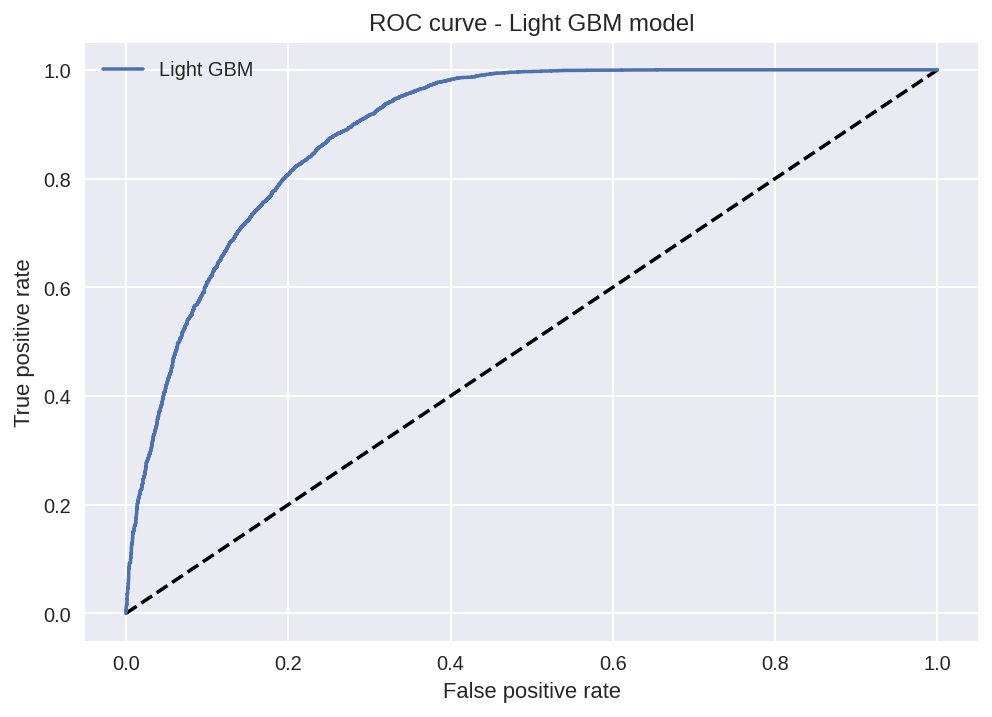

AUC score is 0.8919797526301942


In [ ]:
# Plot the ROC curve and calculate the AUC score for the best LightGBM model.
plot_ROC(best_lgbm, "Light GBM")

In [ ]:
def plot_feature_importance(model, labels):
    '''Plot the feature importance plot and save the file'''
    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    temp = pd.DataFrame(importances[indices], X.columns[indices])
    temp.columns = ["Feature importance"]
    temp["Feature name"] = temp.index
    plt.subplots(figsize=(10, 8))
    ax = sns.barplot(
        y="Feature name",
        x="Feature importance",
        data=temp.iloc[:20, ]
    )
    plt.title("Feature Importance_"+labels)
    plt.savefig(labels+'_FI.png', dpi=150)
    return

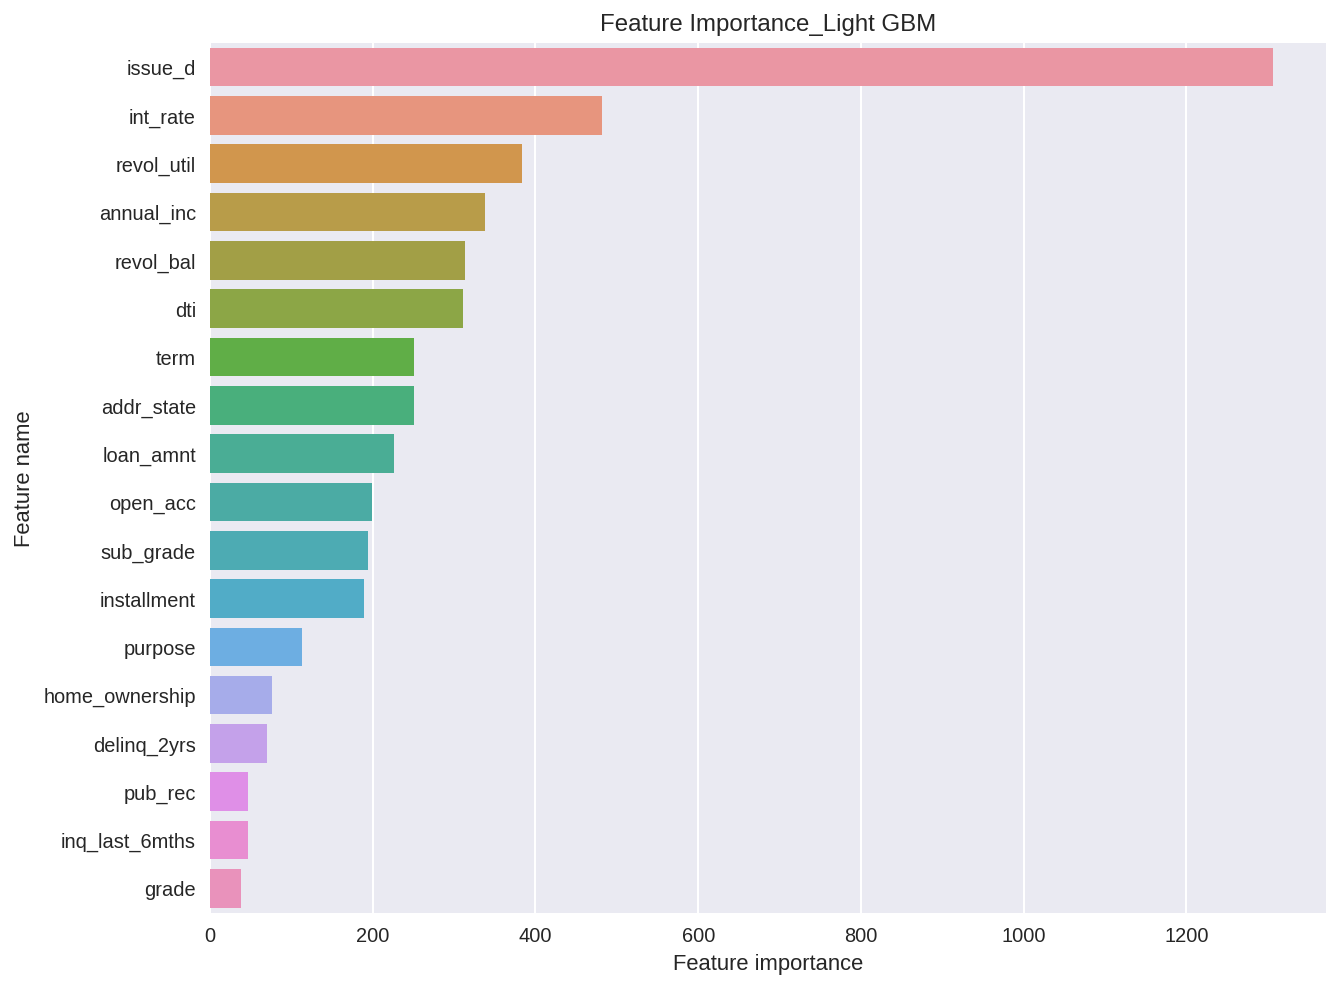

In [ ]:
# Plot and save a bar plot of feature importance for the best LightGBM model.
plot_feature_importance(best_lgbm, "Light GBM")

In [ ]:
# Calculate and display the training and testing accuracy for the best LightGBM model.
def training_score(model):
    print("Training accuracy is {:.4f}".format(model.score(X_train, Y_train)))


def testing_score(model):
    print("Testing accuracy is {:.4f}".format(model.score(X_test, Y_test)))

In [ ]:
Y_pred_lightgbm = best_lgbm.predict(X_test)
testing_score(best_lgbm)

Testing accuracy is 0.8095


In [ ]:
# Generate a confusion matrix plot and classification report for the best LightGBM model.
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


def confusion_plot(model, labels):
    """Plot the confusion plot of the test set"""
    Y_test_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_test_pred)
    model_eval = precision_recall_fscore_support(Y_test, Y_test_pred)
    print("The precision is", model_eval[0])
    print("The recall is", model_eval[1])
    print("The F1 score is", model_eval[2])
    cmap = plt.cm.Reds

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(['No', 'Yes']))
    plt.xticks(tick_marks, ['No', 'Yes'], rotation=45)
    plt.yticks(tick_marks, ['No', 'Yes'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )
    ax = plt.axes()
    t = 'Confusion Matrix:'
    ax.set_title(t, fontweight="bold", size=10)
    plt.savefig(labels+'_cm.png', dpi=150)
    plt.show()

In [ ]:
print(classification_report(Y_test, Y_pred_lightgbm))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      5171
           1       0.78      0.86      0.82      5172

    accuracy                           0.81     10343
   macro avg       0.81      0.81      0.81     10343
weighted avg       0.81      0.81      0.81     10343



In [ ]:
cf = confusion_matrix(Y_test,Y_pred_lightgbm)

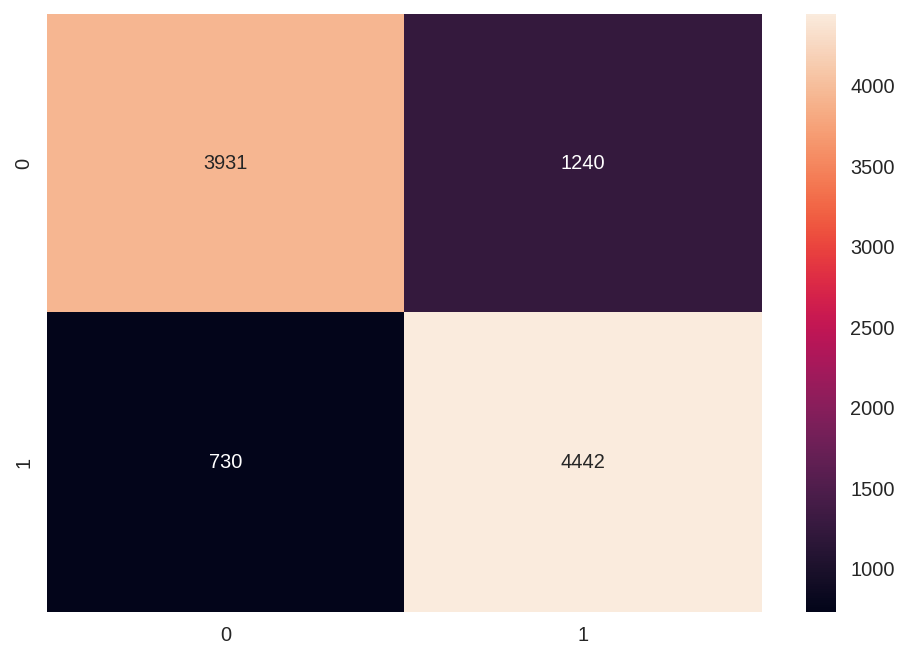

In [ ]:
# Plot a heatmap of the confusion matrix for visualization.
sns.heatmap(data=cf, annot=True, fmt = "g")


Using the dabl library I was able to find the model with the best accuracy; therefore, reducing the time to compute each one of the classifiers. The dabl library selected Light GBM as the best model, but to validate the decision I prefered to manually evaluate the Light GBM classifier.

Given the confusion matrix, the classifier has high precision and moderate recall. The model has a high precision detecting the defaulting borrowers ("0") which is adequate because that class is conformed by the people who are less likely to pay. On the other hand, the precision for the payers ("1") is not as high as the precision to detect defaulting borrowers, but it is still acceptable. Also, the ROC and F1 score are acceptable. In conclusion, the Light GBM classifier is viable. It is important to mention that the variables that most contribute to the model prediction are: "revol_util", "annual_inc", "int_rate", "revol_bal", and "dti". The model considered "Issue_d" to be the variable that most contributes; however, I do not consider it to be because I argue that the month which the loan was funded has nothing to do with the client being a payer or a defaulter.

Key points:
1. The interest rate had a strong connection with the applicant's credit grade.
2. A 60-month term loan has about a 3.27% higher interest rate than a 36-month term loan.
3. The maximum loan limit is up to $40,000.
4. Most borrowers apply for a loan to pay other sources of debt such as: "house", "small_business", and "debt_consolidation".



The following dataset was retrieved from Kaggle, a popular platform for data science and machine learning enthusiasts. This specific dataset, titled 'Lending Club Dataset' was created and shared by Wendy Kan.The dataset can be accessed at the following URL: https://www.kaggle.com/wendykan/lending-club-loan-data

It is worth mentioning that I used a smaller dataset for computational efficiency. The original dataset has 2260668 rows.
